In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%run -i "../src/utils.py"

In [139]:
names = [
    'ClassicCNN_kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]_no_aug',
    'BESTClassicCNN_aug_flip0.5',
    'BESTClassicCNN_aug_gauss_noise0.5',
    'BESTClassicCNN_aug_hue_saturation_value0.5',
    'BESTClassicCNN_aug_transpose0.5',
    'BESTClassicCNN_aug_brightness_contrast0.5',
    'BESTClassicCNN_aug_flip0.5_gauss_noise0.5',
]

names


['ClassicCNN_kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]_no_aug',
 'BESTClassicCNN_aug_flip0.5',
 'BESTClassicCNN_aug_gauss_noise0.5',
 'BESTClassicCNN_aug_hue_saturation_value0.5',
 'BESTClassicCNN_aug_transpose0.5',
 'BESTClassicCNN_aug_brightness_contrast0.5',
 'BESTClassicCNN_aug_flip0.5_gauss_noise0.5']

In [140]:
df = pd.DataFrame()
best_name = ''
histories = {
    'ClassicCNN_kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]_no_aug':dict(),
    'BESTClassicCNN_aug_flip0.5':dict(),
    'BESTClassicCNN_aug_gauss_noise0.5':dict(),
    'BESTClassicCNN_aug_hue_saturation_value0.5':dict(),
    'BESTClassicCNN_aug_transpose0.5':dict(),
    'BESTClassicCNN_aug_brightness_contrast0.5':dict(),
    'BESTClassicCNN_aug_flip0.5_gauss_noise0.5':dict(),
}
for name in names:
    df_ = pd.DataFrame()
    model_info = get_model_info(name)
    histories[name] = model_info['hist']
   
    

In [141]:
histories['BESTClassicCNN_aug_flip0.5_gauss_noise0.5'][1]

{'loss': [[1.620628833770752],
  [1.3502485752105713],
  [1.2718640565872192],
  [1.1838232278823853],
  [1.142837643623352],
  [1.0806753635406494],
  [1.0812848806381226],
  [1.0248783826828003],
  [1.023256778717041],
  [0.9816893339157104],
  [0.9429244995117188],
  [0.9860562086105347],
  [0.9369432330131531],
  [0.9311025142669678],
  [0.8839812874794006],
  [0.9265410304069519],
  [0.8804988861083984],
  [0.8515921831130981],
  [0.9000533819198608],
  [0.8509453535079956],
  [0.8626652956008911],
  [0.8168798685073853],
  [0.7925634384155273],
  [0.871097981929779],
  [0.7935379147529602],
  [0.7648007273674011],
  [0.7376964688301086],
  [0.7209345102310181],
  [0.881427526473999],
  [0.8235766887664795],
  [0.797251284122467],
  [0.7665736675262451],
  [0.7458144426345825],
  [0.8092441558837891],
  [0.7557334899902344],
  [0.7823600769042969],
  [0.7350580096244812],
  [0.7086189985275269],
  [0.6863380074501038],
  [0.6681639552116394],
  [0.6552892923355103],
  [0.835011422

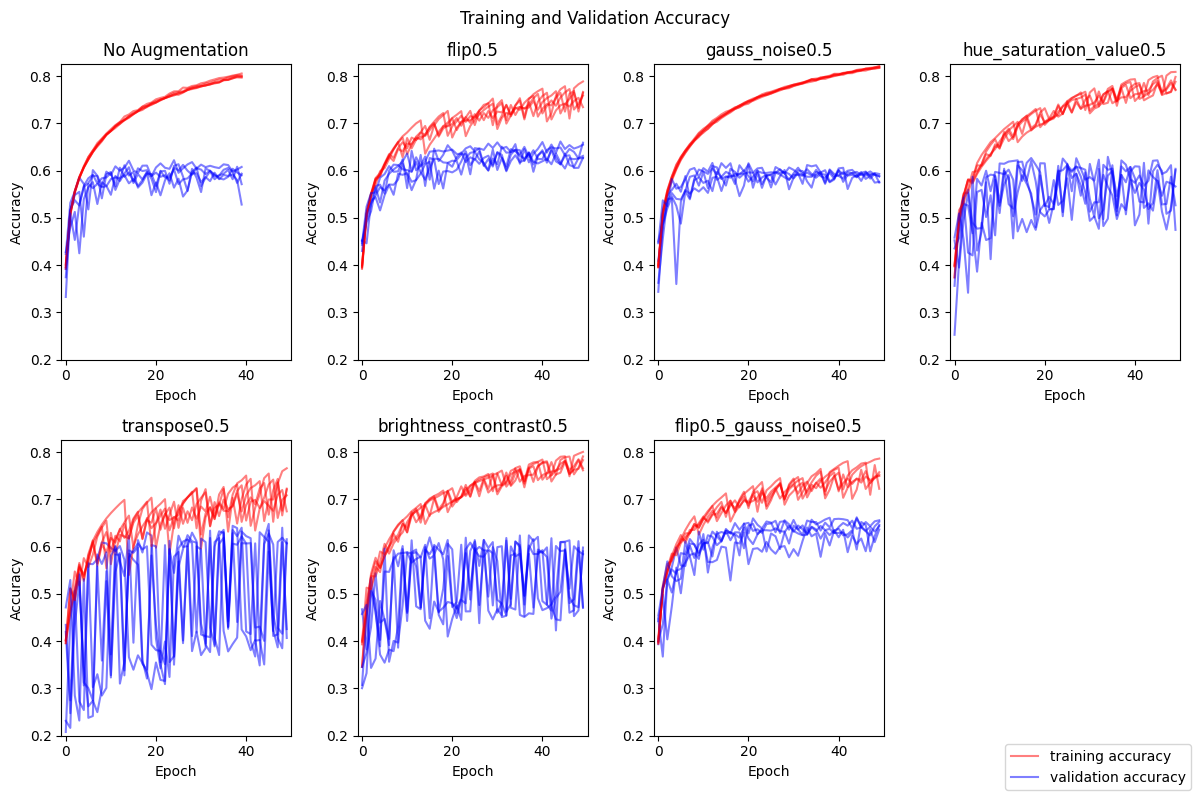

In [142]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

# Plotting the data on subplots
for i, name in enumerate(names):
    row = i // 4
    col = i % 4
    for j in range(5):
        axes[row, col].plot(histories[name][j]['accuracy'], label='training accuracy', alpha=0.5, color = 'red')
        axes[row, col].plot(histories[name][j]['val_accuracy'], label='validation accuracy', alpha=0.5, color = 'blue')

    if name == 'ClassicCNN_kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]_no_aug':
        name = 'No Augmentation'
        names[i] = 'No Augmentation'
    else:
        name = name[19:]
        names[i] = name
    axes[row, col].set_title(name)
    axes[row, col].set_xlabel('Epoch')
    axes[row, col].set_ylabel('Accuracy')
    axes[row, col].set_ylim([0.2, 0.825])
    axes[row, col].set_xlim([-1, 50])


# Adding titles and legends
fig.suptitle('Training and Validation Accuracy')

# add legend
fig.legend(['training accuracy', 'validation accuracy'], loc='lower right')

# Adjusting the spacing between subplots
fig.delaxes(axes.flatten()[7])
fig.tight_layout()
